In [23]:
from sklearn.manifold import TSNE
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from tqdm import tqdm
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
from gensim import matutils, models
import scipy.sparse
import string
from collections import Counter
import pyLDAvis.gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from sklearn.decomposition import LatentDirichletAllocation

# Inception

In [2]:
Inception = pd.read_csv('Inception.csv')
Inception.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2011-07-11 19:59:41,Who understands that Inception movie?,en,[],debbie_nthejets,https://twitter.com/debbie_nthejets/status/905...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
1,2011-07-11 19:59:29,Inception in my pants #improvefilmtitlesbyaddi...,en,['improvefilmtitlesbyaddinginmypants'],MercDeejay,https://twitter.com/MercDeejay/status/90570938...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
2,2011-07-11 19:59:09,RT @ imNot_daFather #GreatHighMovie Inception,en,['greathighmovie'],Lejailatroi,https://twitter.com/Lejailatroi/status/9057085...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
3,2011-07-11 19:58:23,never saw inception,en,[],6tacey,https://twitter.com/6tacey/status/905706630473...,False,0,0,1,NaN,0.0000,0.000,0.0,1.000,0.0000
4,2011-07-11 19:57:45,@jck49erfan @Cornholio3000 was inception the o...,en,[],JHScramble,https://twitter.com/JHScramble/status/90570505...,False,0,2,0,NaN,0.4215,0.123,0.0,0.877,0.4215


# Latent Dirichlet Allocation

In [7]:
# chooose the number of topics you think are in your corpus k = 5
#randomly assigns each word to a topic
#goes through every word and topic assignment in each document, looks at how often the topic occurs in the codument and 
#how often the word occurs in the topic
#go through mulitple iterations of this until the topics are interpretable 

In [8]:
# ^ gensim does this for you

In [9]:
# input: document-term matrix, number of topics, number of iterations
#output: top words in each topic

In [4]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in Inception['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
print(tokenized_tweets)

[['who', 'understands', 'that', 'inception', 'movie'], ['inception', 'in', 'my', 'pants', 'improvefilmtitlesbyaddinginmypants'], ['rt', 'imnot', 'dafather', 'greathighmovie', 'inception'], ['never', 'saw', 'inception'], ['jck49erfan', 'cornholio3000', 'was', 'inception', 'the', 'one', 'where', 'leo', 'is', 'a', 'patient', 'and', 'the', 'ending', 'was', 'spoiled', 'on', 'a', 'popular', 'sport', 's', 'blog'], ['creamadoir', 'inception', 'in', 'my', 'pants', 'lol'], ['esmeraldabaza', 'inception', 'jkjk', 'lol'], ['sleeping', 'in', 'the', 'backseat', 'of', 'a', 'van', 'while', 'it', 's', 'in', 'motion', 'inception'], ['watching', 'adjustment', 'bureau', 'inception', 'with', 'trilbys'], ['inception', 'inception', 'http', 'bit', 'ly', 'nalu29'], ['warriorgrrrl', 'since', 'i', 've', 'watched', 'inception', 'it', 'happens', 'to', 'me', 'all', 'the', 'time', 'brilliant', 'movie', 'but', 'a', 'total', 'mind', 'fuck'], ['improvefilmtitlesbyaddinginmypants', 'inception', 'i', 'my', 'pants'], ['wat

In [5]:
#creating a stop words list - these words don't add much value
from nltk.corpus import stopwords
import string

#adding additional words I don't find to be that valuable
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u']

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

stopwords_list += additional_stopwords

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# isolating every word within tweets for the Inception movie (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

tweets

['understands',
 'inception',
 'movie',
 'inception',
 'pants',
 'improvefilmtitlesbyaddinginmypants',
 'imnot',
 'dafather',
 'greathighmovie',
 'inception',
 'never',
 'saw',
 'inception',
 'jck49erfan',
 'cornholio3000',
 'inception',
 'one',
 'leo',
 'patient',
 'ending',
 'spoiled',
 'popular',
 'sport',
 'blog',
 'creamadoir',
 'inception',
 'pants',
 'lol',
 'esmeraldabaza',
 'inception',
 'jkjk',
 'lol',
 'sleeping',
 'backseat',
 'van',
 'motion',
 'inception',
 'watching',
 'adjustment',
 'bureau',
 'inception',
 'trilbys',
 'inception',
 'inception',
 'bit',
 'nalu29',
 'warriorgrrrl',
 'since',
 'watched',
 'inception',
 'happens',
 'time',
 'brilliant',
 'movie',
 'total',
 'mind',
 'fuck',
 'improvefilmtitlesbyaddinginmypants',
 'inception',
 'pants',
 'watchinq',
 'inception',
 'lenardo',
 '3',
 'like',
 'inception',
 'inception',
 'hmmm',
 'amaaazing',
 'concept',
 'movie',
 'really',
 'liked',
 'read',
 'word',
 'magazines',
 'deejaylunchbox',
 'dream',
 'djexodus',
 '

In [16]:
#document term matrix - tweet by word THIS ONE

In [17]:
#use stemmed words

In [9]:
# Stemming
from nltk.stem import PorterStemmer

In [10]:
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

stemmed_tweets

[['understand', 'incept', 'movi'],
 ['incept', 'pant', 'improvefilmtitlesbyaddinginmyp'],
 ['imnot', 'dafath', 'greathighmovi', 'incept'],
 ['never', 'saw', 'incept'],
 ['jck49erfan',
  'cornholio3000',
  'incept',
  'one',
  'leo',
  'patient',
  'end',
  'spoil',
  'popular',
  'sport',
  'blog'],
 ['creamadoir', 'incept', 'pant', 'lol'],
 ['esmeraldabaza', 'incept', 'jkjk', 'lol'],
 ['sleep', 'backseat', 'van', 'motion', 'incept'],
 ['watch', 'adjust', 'bureau', 'incept', 'trilbi'],
 ['incept', 'incept', 'bit', 'nalu29'],
 ['warriorgrrrl',
  'sinc',
  'watch',
  'incept',
  'happen',
  'time',
  'brilliant',
  'movi',
  'total',
  'mind',
  'fuck'],
 ['improvefilmtitlesbyaddinginmyp', 'incept', 'pant'],
 ['watchinq', 'incept', 'lenardo', '3'],
 ['like', 'incept'],
 ['incept', 'hmmm', 'amaaaz', 'concept', 'movi', 'realli', 'like'],
 ['read',
  'word',
  'magazin',
  'deejaylunchbox',
  'dream',
  'djexodu',
  'incept',
  'dope',
  'movi'],
 ['incept', 'pant', 'improvefilmtitlesbyaddi

In [11]:
len(stemmed_tweets)

5100

In [12]:
Inception['stemmed'] = stemmed_tweets

stemmed_tweets_lst = []
for tweet in Inception['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

Inception['string_stemmed'] = stemmed_tweets_lst

Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2011-07-11 19:59:41,Who understands that Inception movie?,en,[],debbie_nthejets,https://twitter.com/debbie_nthejets/status/905...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[understand, incept, movi]",understand incept movi
1,2011-07-11 19:59:29,Inception in my pants #improvefilmtitlesbyaddi...,en,['improvefilmtitlesbyaddinginmypants'],MercDeejay,https://twitter.com/MercDeejay/status/90570938...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[incept, pant, improvefilmtitlesbyaddinginmyp]",incept pant improvefilmtitlesbyaddinginmyp
2,2011-07-11 19:59:09,RT @ imNot_daFather #GreatHighMovie Inception,en,['greathighmovie'],Lejailatroi,https://twitter.com/Lejailatroi/status/9057085...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[imnot, dafath, greathighmovi, incept]",imnot dafath greathighmovi incept
3,2011-07-11 19:58:23,never saw inception,en,[],6tacey,https://twitter.com/6tacey/status/905706630473...,False,0,0,1,NaN,0.0000,0.000,0.0,1.000,0.0000,"[never, saw, incept]",never saw incept
4,2011-07-11 19:57:45,@jck49erfan @Cornholio3000 was inception the o...,en,[],JHScramble,https://twitter.com/JHScramble/status/90570505...,False,0,2,0,NaN,0.4215,0.123,0.0,0.877,0.4215,"[jck49erfan, cornholio3000, incept, one, leo, ...",jck49erfan cornholio3000 incept one leo patien...


The row numbers represent each tweet and the columns represent every stemmed word tweeted about inception.

In [14]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)

X = vec.fit_transform(Inception['string_stemmed'].tolist())

vec.get_feature_names()

['000',
 '00a',
 '00pm',
 '02',
 '03zutlg',
 '04gb',
 '07',
 '090',
 '0cdefc1',
 '0dizzl',
 '0ijnzn',
 '0jghi4tac5u',
 '0victoria',
 '10',
 '100',
 '1001',
 '100mb',
 '103pvgo7a',
 '1080p',
 '10naciousknight',
 '10thingsihatabouty',
 '10tym',
 '10yr',
 '11',
 '110xz61tc',
 '11303183',
 '119094463',
 '119203927',
 '119272484',
 '11th',
 '12',
 '1202',
 '123juanisher',
 '127',
 '12pm',
 '12th',
 '13',
 '1337olog',
 '13th',
 '13yr',
 '14',
 '146',
 '14gcjjvrv',
 '15',
 '15a',
 '16',
 '160l3l',
 '18t99kyeg',
 '19',
 '1972',
 '1976',
 '1978',
 '1990',
 '1997',
 '1999',
 '19th',
 '19vyp8qf3',
 '1b',
 '1ce',
 '1derri',
 '1djwvt',
 '1h',
 '1hour',
 '1l',
 '1mjg41',
 '1of',
 '1realmusicmak',
 '1st',
 '1w68gr',
 '20',
 '200',
 '2001',
 '2003',
 '2004',
 '2005',
 '2009',
 '2010',
 '2010director',
 '2010genr',
 '2011',
 '20min',
 '20th',
 '21',
 '2199154',
 '21st',
 '22',
 '23',
 '23066787',
 '23pyl',
 '24',
 '24034356',
 '25',
 '26',
 '27',
 '273',
 '27dadon',
 '28',
 '28min',
 '2am',
 '2arrows1p

In [15]:
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.shape

(5100, 6420)

https://www.youtube.com/watch?v=xvqsFTUsOmc&amp%3Bab_channel=PyOhio

https://radimrehurek.com/gensim/models/ldamodel.html

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Columns: 6420 entries, 000 to zzzzzzz
dtypes: int64(6420)
memory usage: 249.8 MB


In [18]:
df.head(15)

,000,00a,00pm,02,03zutlg,04gb,07,090,0cdefc1,0dizzl,...,zooeyglass,zookeep,zoveel,zpdfj,zpxw4,zuckerberg,zumba,zvkyj,zw3yz,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.dtypes

000           int64
00a           int64
00pm          int64
02            int64
03zutlg       int64
              ...  
zuckerberg    int64
zumba         int64
zvkyj         int64
zw3yz         int64
zzzzzzz       int64
Length: 6420, dtype: object

In [20]:
sparse_counts = scipy.sparse.csr_matrix(df)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [21]:
corpus

In [22]:
sparse_counts

<5100x6420 sparse matrix of type '<class 'numpy.int64'>'
	with 30235 stored elements in Compressed Sparse Row format>

In [24]:
dictionary = corpora.Dictionary(Inception['stemmed'])
type(dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gensim.corpora.dictionary.Dictionary

In [25]:
corpus = [dictionary.doc2bow(d) for d in Inception['stemmed']]

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
len(dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6461

In [27]:
dictionary

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.102*"incept" + 0.011*"pant" + 0.010*"gonna" + 0.009*"rock" + 0.008*"dicaprio" + 0.007*"leonardo" + 0.007*"nw" + 0.006*"movi" + 0.005*"great" + 0.005*"ray"'),
 (1,
  '0.110*"incept" + 0.056*"watch" + 0.027*"movi" + 0.014*"time" + 0.008*"like" + 0.008*"think" + 0.007*"see" + 0.007*"love" + 0.006*"good" + 0.006*"lol"'),
 (2,
  '0.201*"incept" + 0.150*"pant" + 0.112*"improvefilmtitlesbyaddinginmyp" + 0.018*"dream" + 0.007*"lol" + 0.006*"like" + 0.004*"improvemovietitlesbyaddinginmyp" + 0.004*"within" + 0.003*"bit" + 0.003*"fuck"'),
 (3,
  '0.068*"incept" + 0.017*"watch" + 0.009*"gt" + 0.006*"go" + 0.006*"movi" + 0.006*"good" + 0.006*"like" + 0.006*"hope" + 0.006*"code" + 0.006*"finish"'),
 (4,
  '0.096*"incept" + 0.032*"dream" + 0.023*"like" + 0.016*"watch" + 0.016*"movi" + 0.011*"play" + 0.009*"time" + 0.009*"brain" + 0.008*"last" + 0.008*"night"')]

In [29]:
for elem in lda.print_topics(-1):
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.102*"incept" + 0.011*"pant" + 0.010*"gonna" + 0.009*"rock" + 0.008*"dicaprio" + 0.007*"leonardo" + 0.007*"nw" + 0.006*"movi" + 0.005*"great" + 0.005*"ray"
Topic 1 
Words: 0.110*"incept" + 0.056*"watch" + 0.027*"movi" + 0.014*"time" + 0.008*"like" + 0.008*"think" + 0.007*"see" + 0.007*"love" + 0.006*"good" + 0.006*"lol"
Topic 2 
Words: 0.201*"incept" + 0.150*"pant" + 0.112*"improvefilmtitlesbyaddinginmyp" + 0.018*"dream" + 0.007*"lol" + 0.006*"like" + 0.004*"improvemovietitlesbyaddinginmyp" + 0.004*"within" + 0.003*"bit" + 0.003*"fuck"
Topic 3 
Words: 0.068*"incept" + 0.017*"watch" + 0.009*"gt" + 0.006*"go" + 0.006*"movi" + 0.006*"good" + 0.006*"like" + 0.006*"hope" + 0.006*"code" + 0.006*"finish"
Topic 4 
Words: 0.096*"incept" + 0.032*"dream" + 0.023*"like" + 0.016*"watch" + 0.016*"movi" + 0.011*"play" + 0.009*"time" + 0.009*"brain" + 0.008*"last" + 0.008*"night"


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.195737 -0.036861       1        1  33.066693
1     -0.078879 -0.067914       2        1  27.209477
4     -0.053304 -0.073586       3        1  16.658860
0     -0.003826  0.153641       4        1  14.533947
3     -0.059727  0.024720       5        1   8.531023, topic_info=                               Term         Freq        Total Category  \
4                              pant  1651.000000  1651.000000  Default   
3    improvefilmtitlesbyaddinginmyp  1196.000000  1196.000000  Default   
31                            watch   648.000000   648.000000  Default   
53                            dream   396.000000   396.000000  Default   
1                              movi   376.000000   376.000000  Default   
..                              ...          ...          ...      ...   
1                              movi    16.549918   376.802723   Topic5   
213                         thought     7.510656    29.168495   Topic5   
53                            dream    13.182996   396.738966   Topic5   
99                             play     8.785352    75.550536   Topic5   
38                             sinc     8.509407    97.614799   Topic5   

     logprob  loglift  
4    30.0000  30.0000  
3    29.0000  29.0000  
31   28.0000  28.0000  
53   27.0000  27.0000  
1    26.0000  26.0000  
..       ...      ...  
1    -5.1106  -0.6639  
213  -5.9007   1.1047  
53   -5.3381  -0.9429  
99   -5.7439   0.3097  
38   -5.7758   0.0216  

[343 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
398       2  0.868227          12
918       3  0.835368          13
2715      2  0.977378        1990
501       2  0.839481         1st
2224      3  0.936761        2001
...     ...       ...         ...
863       1  0.039952      youtub
863       2  0.838985      youtub
863       3  0.079903      youtub
1162      4  0.812159  zeecaptein
2230      3  0.908273       zumba

[633 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 1, 4])

https://www.kaggle.com/yohanb/lda-visualized-using-t-sne-and-bokeh

# T-SNE

In [31]:
print(range(len(corpus)))
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
X

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


range(0, 5100)


[[0.050558522, 0.79693234, 0.05098504, 0.05055847, 0.050965644],
 [0.05028504, 0.05026045, 0.7990649, 0.05016082, 0.050228823],
 [0.040333953, 0.04035607, 0.040682837, 0.040237438, 0.8383897],
 [0.05060518, 0.79662997, 0.05111891, 0.05079255, 0.050853353],
 [0.017169213, 0.017276442, 0.017223664, 0.017231869, 0.9310988],
 [0.04026374, 0.040432066, 0.8387777, 0.040228345, 0.040298145],
 [0.040391687, 0.8378175, 0.040993344, 0.04034351, 0.040453967],
 [0.034006122, 0.033963185, 0.8638061, 0.03345352, 0.03477104],
 [0.033645295, 0.034394078, 0.033937853, 0.86424017, 0.033782627],
 [0.040621568, 0.040887374, 0.8373469, 0.04067912, 0.040465023],
 [0.016833628, 0.52467567, 0.42471078, 0.016798675, 0.016981272],
 [0.050295144, 0.050263833, 0.7990489, 0.050161418, 0.05023069],
 [0.04041413, 0.040700477, 0.8383151, 0.0401557, 0.040414594],
 [0.067877576, 0.06829453, 0.06960758, 0.06767378, 0.7265465],
 [0.025565084, 0.55178744, 0.025508339, 0.37149456, 0.02564458],
 [0.02014612, 0.17072028, 0.7

In [32]:
hm = np.array(X)
hm

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.05055852, 0.79693234, 0.05098504, 0.05055847, 0.05096564],
       [0.05028504, 0.05026045, 0.7990649 , 0.05016082, 0.05022882],
       [0.04033395, 0.04035607, 0.04068284, 0.04023744, 0.8383897 ],
       ...,
       [0.05335825, 0.0506016 , 0.05111992, 0.05038665, 0.79453355],
       [0.34781927, 0.01089932, 0.61967254, 0.01075625, 0.0108526 ],
       [0.8646366 , 0.03362522, 0.03388806, 0.03348026, 0.0343698 ]],
      dtype=float32)

In [33]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='x', ylabel='y'>

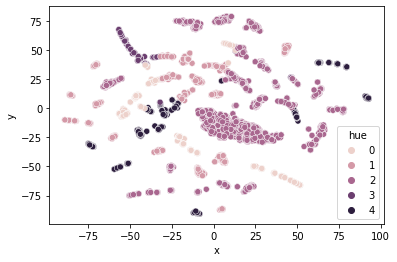

In [34]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding
)

# Ingrid Goes West

In [35]:
IngridGoesWest = pd.read_csv('IngridGoesWest.csv')
IngridGoesWest.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
IngridGoesWest.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN,0.0000,0.000,0.000,1.000,0.0000
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN,0.3400,0.111,0.062,0.827,0.3400
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN,0.4404,0.083,0.000,0.917,0.4404
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN,-0.2500,0.000,0.182,0.818,-0.2500
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN,0.6369,0.208,0.000,0.792,0.6369


In [36]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in IngridGoesWest['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
print(tokenized_tweets)

[['another', 'day', 'another', 'avocado', 'toast', 'avocadotoast', 'ingridgoeswest', '31days31photos', 'https', 't', 'co', 'zgekn5ukvu'], ['ingridgoeswest', 'is', 'a', 'total', 'package', 'when', 'you', 'want', 'to', 'advise', 'your', 'sorry', 'ass', 'sm', 'addictive', 'self', 'love', 'for', 'oneself', 'is', 'key', 'and', 'should', 'not', 'be', 'influenced', 'by', 'sm', 'it', 'tells', 'the', 'story', 'of', 'addiction', 'fake', 'life', 'forcing', 'to', 'belong', 'giving', 'up', 'and', 'more', 'a', 'must', 'watch'], ['44', 'step', '45', 'the', 'dark', 'tower', '46', 'ingrid', 'goes', 'west', '47', 'naked', '2017', '48', 'good', 'time', '49', 'the', 'nut', 'job', '2', '50', 'the', 'wound', '51', 'a', 'gentleman', '52', 'the', 'beach', 'rats'], ['ingrid', 'goes', 'west', 'official', 'teaser', 'august', '2017', 'neon', 'https', 't', 'co', 'o7x4vnb7tp', 'https', 't', 'co', 'eoq7wd5cms'], ['two', 'movies', 'own', 'my', 'whole', 'heart', 'and', 'that', 'is', 'the', 'kings', 'of', 'summer', 'an

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
#creating a stop words list - these words don't add much value
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u']

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

stopwords_list += additional_stopwords

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# isolating every word within tweets for the Ingrid Goes West (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

tweets

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['another',
 'day',
 'another',
 'avocado',
 'toast',
 'avocadotoast',
 'ingridgoeswest',
 '31days31photos',
 'zgekn5ukvu',
 'ingridgoeswest',
 'total',
 'package',
 'want',
 'advise',
 'sorry',
 'ass',
 'sm',
 'addictive',
 'self',
 'love',
 'oneself',
 'key',
 'influenced',
 'sm',
 'tells',
 'story',
 'addiction',
 'fake',
 'life',
 'forcing',
 'belong',
 'giving',
 'must',
 'watch',
 '44',
 'step',
 '45',
 'dark',
 'tower',
 '46',
 'ingrid',
 'goes',
 'west',
 '47',
 'naked',
 '2017',
 '48',
 'good',
 'time',
 '49',
 'nut',
 'job',
 '2',
 '50',
 'wound',
 '51',
 'gentleman',
 '52',
 'beach',
 'rats',
 'ingrid',
 'goes',
 'west',
 'official',
 'teaser',
 'august',
 '2017',
 'neon',
 'o7x4vnb7tp',
 'eoq7wd5cms',
 'two',
 'movies',
 'whole',
 'heart',
 'kings',
 'summer',
 'ingrid',
 'goes',
 'west',
 'forever',
 'grateful',
 'film',
 'thank',
 'infinitely',
 'heart',
 'roadtrips',
 'made',
 'see',
 'film',
 'worth',
 'every',
 'time',
 'watch',
 'film',
 'love',
 'ingridgoeswest',
 'h

In [40]:
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

stemmed_tweets

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['anoth',
  'day',
  'anoth',
  'avocado',
  'toast',
  'avocadotoast',
  'ingridgoeswest',
  '31days31photo',
  'zgekn5ukvu'],
 ['ingridgoeswest',
  'total',
  'packag',
  'want',
  'advis',
  'sorri',
  'ass',
  'sm',
  'addict',
  'self',
  'love',
  'oneself',
  'key',
  'influenc',
  'sm',
  'tell',
  'stori',
  'addict',
  'fake',
  'life',
  'forc',
  'belong',
  'give',
  'must',
  'watch'],
 ['44',
  'step',
  '45',
  'dark',
  'tower',
  '46',
  'ingrid',
  'goe',
  'west',
  '47',
  'nake',
  '2017',
  '48',
  'good',
  'time',
  '49',
  'nut',
  'job',
  '2',
  '50',
  'wound',
  '51',
  'gentleman',
  '52',
  'beach',
  'rat'],
 ['ingrid',
  'goe',
  'west',
  'offici',
  'teaser',
  'august',
  '2017',
  'neon',
  'o7x4vnb7tp',
  'eoq7wd5cm'],
 ['two', 'movi', 'whole', 'heart', 'king', 'summer', 'ingrid', 'goe', 'west'],
 ['forev',
  'grate',
  'film',
  'thank',
  'infinit',
  'heart',
  'roadtrip',
  'made',
  'see',
  'film',
  'worth',
  'everi',
  'time',
  'watch',

In [41]:
IngridGoesWest['stemmed'] = stemmed_tweets

stemmed_tweets_lst = []
for tweet in IngridGoesWest['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

IngridGoesWest['string_stemmed'] = stemmed_tweets_lst

IngridGoesWest.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN,0.0000,0.000,0.000,1.000,0.0000,"[anoth, day, anoth, avocado, toast, avocadotoa...",anoth day anoth avocado toast avocadotoast ing...
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN,0.3400,0.111,0.062,0.827,0.3400,"[ingridgoeswest, total, packag, want, advis, s...",ingridgoeswest total packag want advis sorri a...
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN,0.4404,0.083,0.000,0.917,0.4404,"[44, step, 45, dark, tower, 46, ingrid, goe, w...",44 step 45 dark tower 46 ingrid goe west 47 na...
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN,-0.2500,0.000,0.182,0.818,-0.2500,"[ingrid, goe, west, offici, teaser, august, 20...",ingrid goe west offici teaser august 2017 neon...
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN,0.6369,0.208,0.000,0.792,0.6369,"[two, movi, whole, heart, king, summer, ingrid...",two movi whole heart king summer ingrid goe west


In [42]:
# sparse Document Term Matrix

vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(IngridGoesWest['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,00,000,01,03,03r1y4v3l2,03ug2g0kfi,05,05mfzdgjrf,06,07,...,zvq9zr3hg,zvvrqycogw,zvyagintsev,zwfil4zopz,zwskaxpq6k,zx6079v1w9,zz31znmrok,zzbhlcobxr,zztd7pzbvc,zztopport
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
sparse_counts = scipy.sparse.csr_matrix(df)
corpus = matutils.Sparse2Corpus(sparse_counts)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
dictionary = corpora.Dictionary(IngridGoesWest['stemmed'])

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


https://www.kite.com/python/docs/gensim.corpora.Dictionary.doc2bow

In [48]:
corpus = []
for tweet in IngridGoesWest['stemmed']:
#     print(dictionary.doc2bow(tweet))
    corpus.append(dictionary.doc2bow(tweet))

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.102*"ingrid" + 0.100*"goe" + 0.100*"west" + 0.027*"watch" + 0.018*"movi" + 0.008*"dvd" + 0.008*"like" + 0.007*"win" + 0.006*"good" + 0.006*"heyuguy"'),
 (1,
  '0.040*"ingrid" + 0.039*"goe" + 0.038*"west" + 0.030*"ingridgoeswest" + 0.021*"movi" + 0.018*"plaza" + 0.018*"aubrey" + 0.013*"watch" + 0.012*"evilhag" + 0.010*"best"'),
 (2,
  '0.038*"ingrid" + 0.037*"goe" + 0.037*"west" + 0.019*"2017" + 0.017*"10" + 0.015*"spicer" + 0.014*"matt" + 0.010*"5" + 0.009*"ingridgoeswest" + 0.007*"2"'),
 (3,
  '0.049*"ingridgoeswest" + 0.018*"ingrid" + 0.017*"west" + 0.017*"goe" + 0.016*"watch" + 0.013*"win" + 0.012*"comedi" + 0.011*"social" + 0.010*"media" + 0.009*"2017"'),
 (4,
  '0.049*"ingrid" + 0.048*"goe" + 0.048*"west" + 0.017*"watch" + 0.013*"good" + 0.010*"film" + 0.010*"ingridgoeswest" + 0.008*"time" + 0.007*"big" + 0.007*"sick"')]

In [52]:
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.102*"ingrid" + 0.100*"goe" + 0.100*"west" + 0.027*"watch" + 0.018*"movi" + 0.008*"dvd" + 0.008*"like" + 0.007*"win" + 0.006*"good" + 0.006*"heyuguy"
Topic 1 
Words: 0.040*"ingrid" + 0.039*"goe" + 0.038*"west" + 0.030*"ingridgoeswest" + 0.021*"movi" + 0.018*"plaza" + 0.018*"aubrey" + 0.013*"watch" + 0.012*"evilhag" + 0.010*"best"
Topic 2 
Words: 0.038*"ingrid" + 0.037*"goe" + 0.037*"west" + 0.019*"2017" + 0.017*"10" + 0.015*"spicer" + 0.014*"matt" + 0.010*"5" + 0.009*"ingridgoeswest" + 0.007*"2"
Topic 3 
Words: 0.049*"ingridgoeswest" + 0.018*"ingrid" + 0.017*"west" + 0.017*"goe" + 0.016*"watch" + 0.013*"win" + 0.012*"comedi" + 0.011*"social" + 0.010*"media" + 0.009*"2017"
Topic 4 
Words: 0.049*"ingrid" + 0.048*"goe" + 0.048*"west" + 0.017*"watch" + 0.013*"good" + 0.010*"film" + 0.010*"ingridgoeswest" + 0.008*"time" + 0.007*"big" + 0.007*"sick"


c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.100720  0.053030       1        1  36.561141
1      0.025471  0.060959       2        1  27.856193
4      0.055851 -0.033317       3        1  16.234492
2     -0.035608 -0.152006       4        1  10.428527
3     -0.146433  0.071334       5        1   8.919647, topic_info=               Term        Freq        Total Category  logprob  loglift
5    ingridgoeswest  959.000000   959.000000  Default  30.0000  30.0000
817              10  121.000000   121.000000  Default  29.0000  29.0000
31             2017  405.000000   405.000000  Default  28.0000  28.0000
241           plaza  370.000000   370.000000  Default  27.0000  27.0000
232          aubrey  369.000000   369.000000  Default  26.0000  26.0000
..              ...         ...          ...      ...      ...      ...
46           ingrid   98.683170  3854.342347   Topic5  -4.0257  -1.2481
54             west   96.337077  3742.732864   Topic5  -4.0497  -1.2428
44              goe   95.107322  3765.241191   Topic5  -4.0626  -1.2616
18             love   32.615035   303.273431   Topic5  -5.1328   0.1871
79   osheajacksonjr   21.790753   118.562334   Topic5  -5.5361   0.7230

[353 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
214       1  0.106005           1
214       2  0.365127           1
214       3  0.106005           1
214       4  0.376905           1
214       5  0.058891           1
...     ...       ...         ...
3861      2  0.800934     written
5792      1  0.868663  xunlwectek
5751      1  0.868660  y4ldygbijo
5522      4  0.928592     yodajon
5785      1  0.868672   you7c8cjr

[732 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 3, 4])